Kaggle Dataset Link - https://www.kaggle.com/rakeshrau/social-network-ads 

We will learn to implement both Linear and kernel SVM classification on this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
dataset = pd.read_csv("sample/Social_Network_Ads.csv")
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


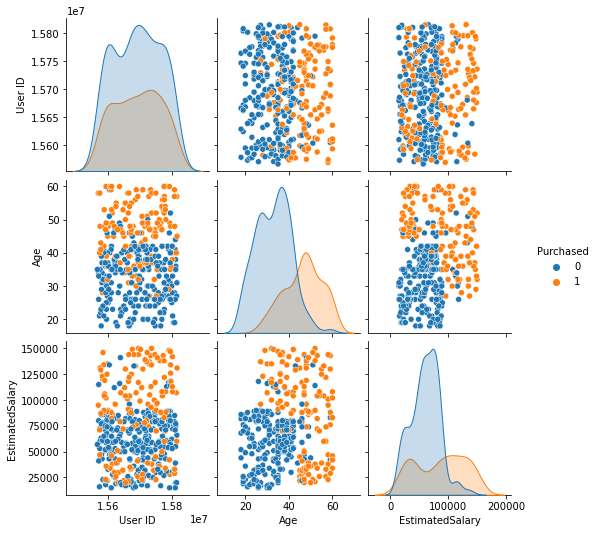

In [3]:
# Understand the data through graphs
sns.pairplot(data = dataset, hue = 'Purchased', kind = 'scatter')
plt.show()

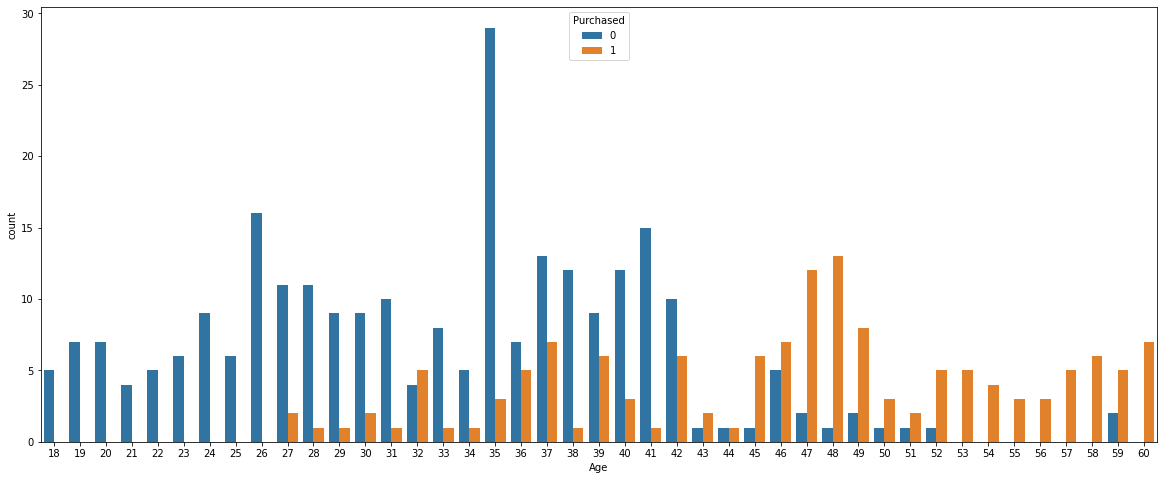

In [4]:
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(x = 'Age', hue= 'Purchased', data = dataset)
plt.show()

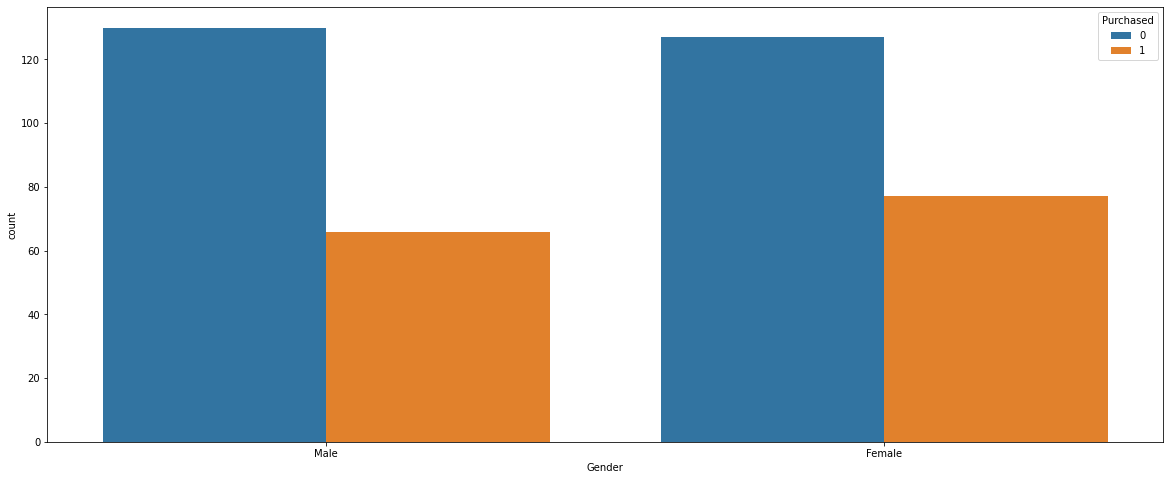

In [5]:
fig, ax = plt.subplots(figsize = (20,8))
sns.countplot(x = 'Gender', hue= 'Purchased', data = dataset)
plt.show()

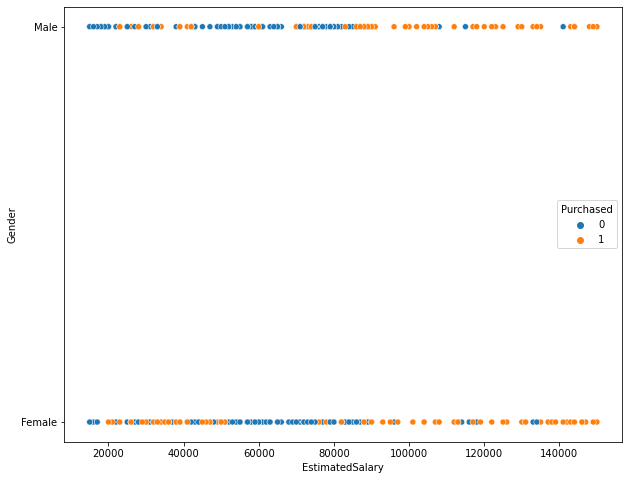

In [6]:
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = 'EstimatedSalary', y = 'Gender' ,hue= 'Purchased', data = dataset)
plt.show()

In [7]:
dataset['User ID'].unique()

array([15624510, 15810944, 15668575, 15603246, 15804002, 15728773,
       15598044, 15694829, 15600575, 15727311, 15570769, 15606274,
       15746139, 15704987, 15628972, 15697686, 15733883, 15617482,
       15704583, 15621083, 15649487, 15736760, 15714658, 15599081,
       15705113, 15631159, 15792818, 15633531, 15744529, 15669656,
       15581198, 15729054, 15573452, 15776733, 15724858, 15713144,
       15690188, 15689425, 15671766, 15782806, 15764419, 15591915,
       15772798, 15792008, 15715541, 15639277, 15798850, 15776348,
       15727696, 15793813, 15694395, 15764195, 15744919, 15671655,
       15654901, 15649136, 15775562, 15807481, 15642885, 15789109,
       15814004, 15673619, 15595135, 15583681, 15605000, 15718071,
       15679760, 15654574, 15577178, 15595324, 15756932, 15726358,
       15595228, 15782530, 15592877, 15651983, 15746737, 15774179,
       15667265, 15655123, 15595917, 15668385, 15709476, 15711218,
       15798659, 15663939, 15694946, 15631912, 15768816, 15682

In [8]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### We can observe the following
    
        * W.r.t age, the majority of the people who purchased are between 27 to 60 years of age
        * W.r.t gender, the majority of purchased are females
        * w.r.t salary and purchased product, Male gender has purchased product if the salary is more than 800000 or more
        * Out of dataset, all the user id are unique and no repeating customer

In [10]:
dataset = dataset.drop(columns = ['Gender'], axis = 1)

In [11]:
dataset = dataset.drop(columns = ['User ID'], axis = 1)

In [12]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [13]:
x1 = dataset.iloc[:, : 2].values
y1 = dataset.iloc[:, -1].values

In [14]:
x1

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [15]:
y1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [16]:
from sklearn.model_selection import train_test_split as ttst
x1_train, x1_test, y1_train, y1_test = ttst(x1,y1, test_size = 0.35, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler as SC
sc_x = SC()
x1_train = sc_x.fit_transform(x1_train)
x1_test = sc_x.fit_transform(x1_test)

In [18]:
from sklearn.svm import SVC
classifier_linear = SVC(kernel = 'linear', random_state = 0)
classifier_linear.fit(x1_train, y1_train)

SVC(kernel='linear', random_state=0)

In [19]:
ylinear_predict = classifier_linear.predict(x1_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, ylinear_predict)
cm

array([[84,  5],
       [20, 31]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

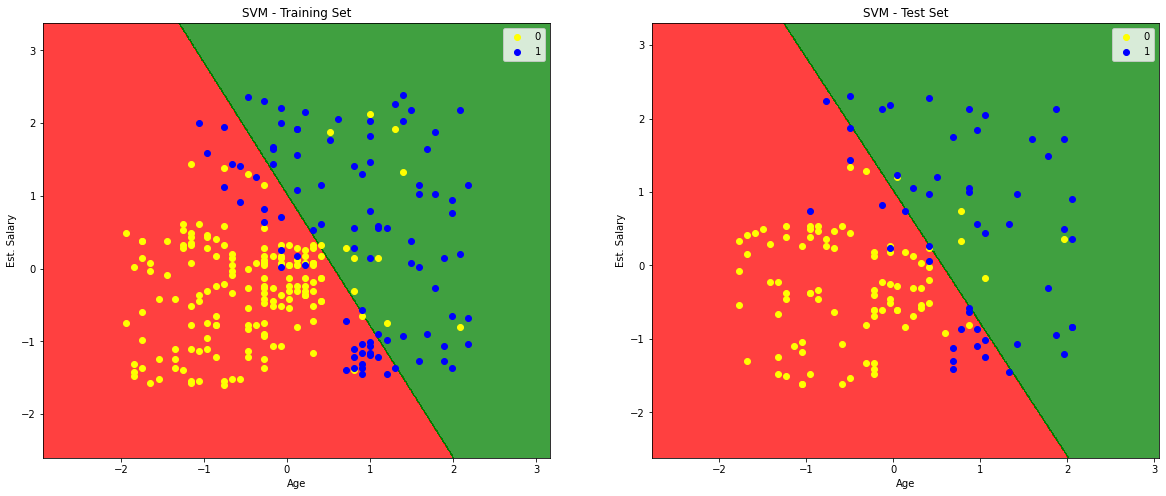

In [21]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize = (20,8))

plt.subplot(1,2,1)
x1_set, y1_set = x1_train, y1_train
X1,X2 = np.meshgrid(

    np.arange(start = x1_set[:, 0].min() - 1, stop = x1_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x1_set[:, 1].min() - 1, stop = x1_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X1,X2,classifier_linear.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set == j, 0], x1_set[y1_set == j, 1],
               c=ListedColormap(('yellow','blue'))(i),label=j)
plt.title("SVM - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()

plt.subplot(1,2,2)

x1_set, y1_set = x1_test, y1_test

X1,X2 = np.meshgrid(

    np.arange(start = x1_set[:, 0].min() - 1, stop = x1_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x1_set[:, 1].min() - 1, stop = x1_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X1,X2,classifier_linear.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set == j, 0], x1_set[y1_set == j, 1],
               c=ListedColormap(('yellow','blue'))(i),label=j)
plt.title("SVM - Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()
plt.show()

## Above is the example of Linear Kernel, below, we will try for Radial Basis function (rbf) or Gaussian Kernel, we will try to implement polynomial at last

In [22]:
x2 = dataset.iloc[:, :2].values
y2 = dataset.iloc[:, -1].values

In [23]:
from sklearn.model_selection import train_test_split as ttst
x2_train, x2_test, y2_train, y2_test = ttst(x2,y2, test_size = 0.35, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler as SC
sc_x = SC()
x2_train = sc_x.fit_transform(x2_train)
x2_test = sc_x.fit_transform(x2_test)

In [25]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(x2_train, y2_train)

SVC(random_state=0)

In [26]:
yrbf_predict = classifier_rbf.predict(x2_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,yrbf_predict )
cm

array([[80,  9],
       [ 4, 47]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

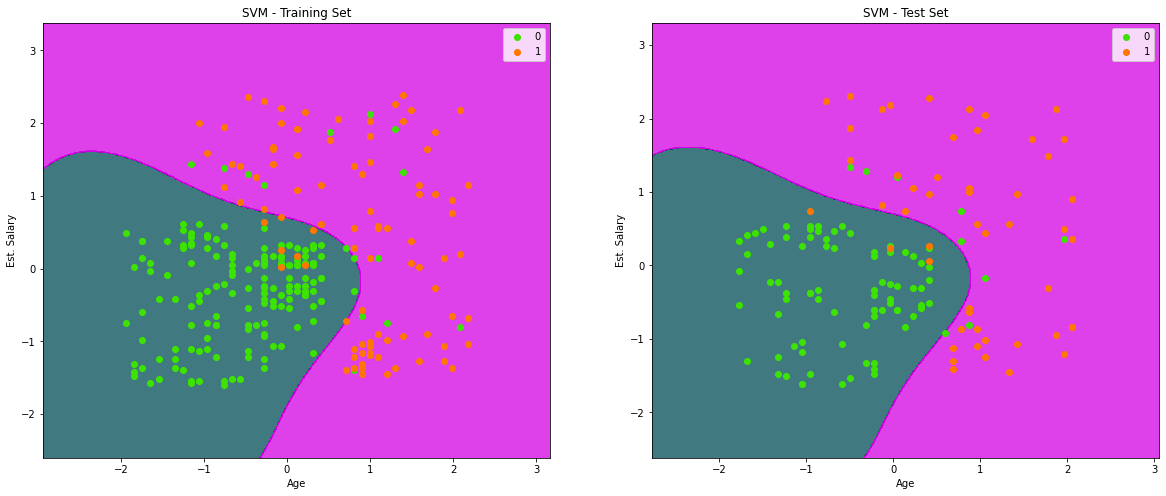

In [28]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize = (20,8))

plt.subplot(1,2,1)
x2_set, y2_set = x2_train, y2_train
X3,X4 = np.meshgrid(

    np.arange(start = x2_set[:, 0].min() - 1, stop = x2_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x2_set[:, 1].min() - 1, stop = x2_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X3,X4,classifier_rbf.predict(
    np.array([X3.ravel(), X4.ravel()]).T).reshape(X3.shape), alpha=0.75,
    cmap=ListedColormap(('#004e55','#d400e3')))

plt.xlim(X3.min(), X3.max())
plt.ylim(X4.min(), X4.max())
for i, j in enumerate(np.unique(y2_set)):
    plt.scatter(x2_set[y2_set == j, 0], x2_set[y2_set == j, 1],
               c=ListedColormap(('#3de300','#ff7700'))(i),label=j)
plt.title("SVM - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()

plt.subplot(1,2,2)

x2_set, y2_set = x2_test, y2_test
X3,X4 = np.meshgrid(

    np.arange(start = x2_set[:, 0].min() - 1, stop = x2_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x2_set[:, 1].min() - 1, stop = x2_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X3,X4,classifier_rbf.predict(
    np.array([X3.ravel(), X4.ravel()]).T).reshape(X3.shape), alpha=0.75,
    cmap=ListedColormap(('#004e55','#d400e3')))

plt.xlim(X3.min(), X3.max())
plt.ylim(X4.min(), X4.max())
for i, j in enumerate(np.unique(y2_set)):
    plt.scatter(x2_set[y2_set == j, 0], x2_set[y2_set == j, 1],
               c=ListedColormap(('#3de300','#ff7700'))(i),label=j)
plt.title("SVM - Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()

plt.show()

In [29]:
x3 = dataset.iloc[:, :2].values
y3 = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split as ttst
x3_train,x3_test, y3_train, y3_test = ttst(x3,y3, test_size = 0.35, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler as SC
sc_x = SC()
x3_train = sc_x.fit_transform(x3_train)
x3_test = sc_x.fit_transform(x3_test)

In [31]:
from sklearn.svm import SVC
classifier_poly = SVC(kernel = 'poly', C = 1.0)
classifier_poly.fit(x3_train, y3_train)

SVC(kernel='poly')

In [32]:
ypoly_predict = classifier_poly.predict(x3_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y3_test,ypoly_predict )
cm

array([[87,  2],
       [21, 30]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

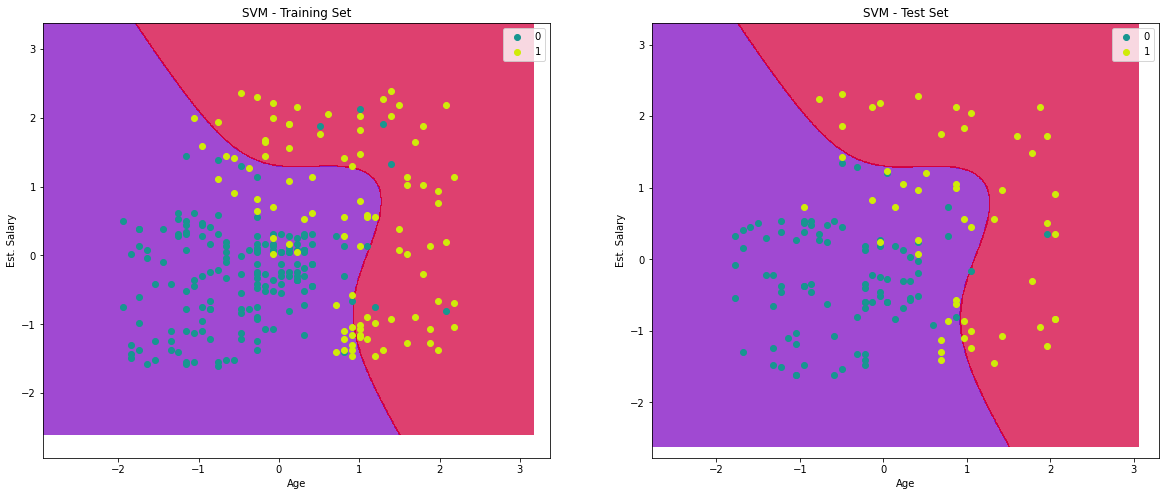

In [34]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize = (20,8))

plt.subplot(1,2,1)
x3_set, y3_set = x3_train, y3_train
X5,X6 = np.meshgrid(

    np.arange(start = x3_set[:, 0].min() - 1, stop = x3_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x3_set[:, 1].min() - 1, stop = x3_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X5,X6,classifier_poly.predict(
    np.array([X5.ravel(), X6.ravel()]).T).reshape(X5.shape), alpha=0.75,
    cmap=ListedColormap(('#810cc4','#d4003f')))

plt.xlim(X5.min(), X6.max())
plt.ylim(X5.min(), X6.max())
for i, j in enumerate(np.unique(y3_set)):
    plt.scatter(x3_set[y3_set == j, 0], x3_set[y3_set == j, 1],
               c=ListedColormap(('#179690','#d0eb09'))(i),label=j)
plt.title("SVM - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()

plt.subplot(1,2,2)

x3_set, y3_set = x3_test, y3_test
X5,X6 = np.meshgrid(

    np.arange(start = x3_set[:, 0].min() - 1, stop = x3_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x3_set[:, 1].min() - 1, stop = x3_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X5,X6,classifier_poly.predict(
    np.array([X5.ravel(), X6.ravel()]).T).reshape(X5.shape), alpha=0.75,
    cmap=ListedColormap(('#810cc4','#d4003f')))

plt.xlim(X5.min(), X6.max())
plt.ylim(X5.min(), X6.max())
for i, j in enumerate(np.unique(y3_set)):
    plt.scatter(x3_set[y3_set == j, 0], x3_set[y3_set == j, 1],
               c=ListedColormap(('#179690','#d0eb09'))(i),label=j)
plt.title("SVM - Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()
plt.show()

## Let us now how Linear and rbf kernel classification looks 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

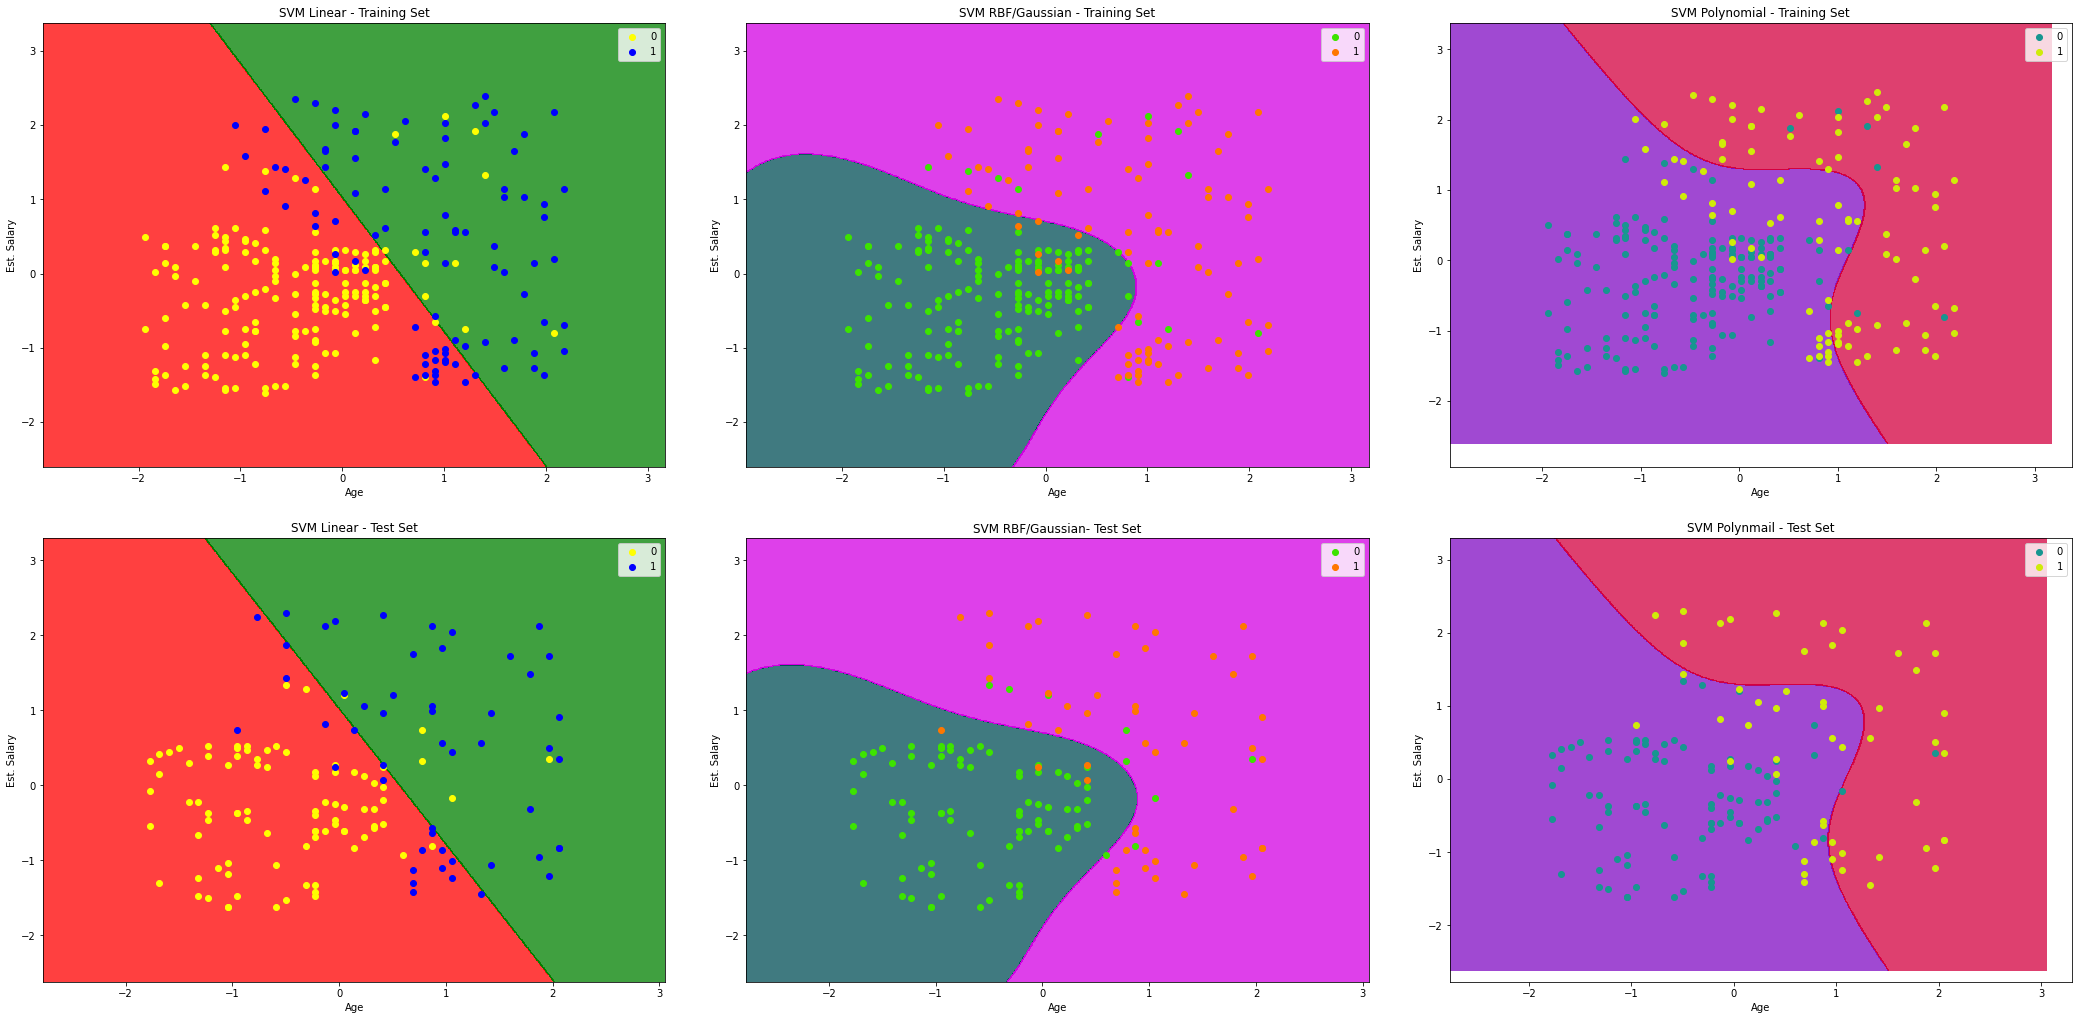

In [35]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (30,15))
fig.tight_layout(pad = 5.0)

plt.subplot(2,3,1)
x1_set, y1_set = x1_train, y1_train
X1,X2 = np.meshgrid(

    np.arange(start = x1_set[:, 0].min() - 1, stop = x1_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x1_set[:, 1].min() - 1, stop = x1_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X1,X2,classifier_linear.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set == j, 0], x1_set[y1_set == j, 1],
               c=ListedColormap(('yellow','blue'))(i),label=j)
plt.title("SVM Linear - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()


plt.subplot(2,3,2)
x2_set, y2_set = x2_train, y2_train
X3,X4 = np.meshgrid(

    np.arange(start = x2_set[:, 0].min() - 1, stop = x2_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x2_set[:, 1].min() - 1, stop = x2_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X3,X4,classifier_rbf.predict(
    np.array([X3.ravel(), X4.ravel()]).T).reshape(X3.shape), alpha=0.75,
    cmap=ListedColormap(('#004e55','#d400e3')))

plt.xlim(X3.min(), X3.max())
plt.ylim(X4.min(), X4.max())
for i, j in enumerate(np.unique(y2_set)):
    plt.scatter(x2_set[y2_set == j, 0], x2_set[y2_set == j, 1],
               c=ListedColormap(('#3de300','#ff7700'))(i),label=j)
plt.title("SVM RBF/Gaussian - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()



plt.subplot(2,3,3)
x3_set, y3_set = x3_train, y3_train
X5,X6 = np.meshgrid(

    np.arange(start = x3_set[:, 0].min() - 1, stop = x3_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x3_set[:, 1].min() - 1, stop = x3_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X5,X6,classifier_poly.predict(
    np.array([X5.ravel(), X6.ravel()]).T).reshape(X5.shape), alpha=0.75,
    cmap=ListedColormap(('#810cc4','#d4003f')))

plt.xlim(X5.min(), X6.max())
plt.ylim(X5.min(), X6.max())
for i, j in enumerate(np.unique(y3_set)):
    plt.scatter(x3_set[y3_set == j, 0], x3_set[y3_set == j, 1],
               c=ListedColormap(('#179690','#d0eb09'))(i),label=j)
plt.title("SVM Polynomial - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()



plt.subplot(2,3,4)
x1_set, y1_set = x1_test, y1_test

X1,X2 = np.meshgrid(

    np.arange(start = x1_set[:, 0].min() - 1, stop = x1_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x1_set[:, 1].min() - 1, stop = x1_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X1,X2,classifier_linear.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set == j, 0], x1_set[y1_set == j, 1],
               c=ListedColormap(('yellow','blue'))(i),label=j)
plt.title("SVM Linear - Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()


plt.subplot(2,3,5)
x2_set, y2_set = x2_test, y2_test
X3,X4 = np.meshgrid(

    np.arange(start = x2_set[:, 0].min() - 1, stop = x2_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x2_set[:, 1].min() - 1, stop = x2_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X3,X4,classifier_rbf.predict(
    np.array([X3.ravel(), X4.ravel()]).T).reshape(X3.shape), alpha=0.75,
    cmap=ListedColormap(('#004e55','#d400e3')))

plt.xlim(X3.min(), X3.max())
plt.ylim(X4.min(), X4.max())
for i, j in enumerate(np.unique(y2_set)):
    plt.scatter(x2_set[y2_set == j, 0], x2_set[y2_set == j, 1],
               c=ListedColormap(('#3de300','#ff7700'))(i),label=j)
plt.title("SVM RBF/Gaussian- Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()

plt.subplot(2,3,6)
x3_set, y3_set = x3_test, y3_test
X5,X6 = np.meshgrid(

    np.arange(start = x3_set[:, 0].min() - 1, stop = x3_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x3_set[:, 1].min() - 1, stop = x3_set[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X5,X6,classifier_poly.predict(
    np.array([X5.ravel(), X6.ravel()]).T).reshape(X5.shape), alpha=0.75,
    cmap=ListedColormap(('#810cc4','#d4003f')))

plt.xlim(X5.min(), X6.max())
plt.ylim(X5.min(), X6.max())
for i, j in enumerate(np.unique(y3_set)):
    plt.scatter(x3_set[y3_set == j, 0], x3_set[y3_set == j, 1],
               c=ListedColormap(('#179690','#d0eb09'))(i),label=j)
plt.title("SVM Polynmail - Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()




In [36]:
# Let's check confusion matrix for each kernel

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y1_test, ylinear_predict)
cm2 = confusion_matrix(y2_test, yrbf_predict)
cm3 = confusion_matrix(y3_test, ypoly_predict)

print("The Confusion Matrix for Linear Kernel is \n ", cm1, "\n \n and the Confusion Matrix for Radial Basis Function(RBF) Kernel or Gaussian Function Kernel is \n",cm2, "\n \n and at last the Confusion Matrix for the Polynomial Kernel is \n",cm3)

The Confusion Matrix for Linear Kernel is 
  [[84  5]
 [20 31]] 
 
 and the Confusion Matrix for Radial Basis Function(RBF) Kernel or Gaussian Function Kernel is 
 [[80  9]
 [ 4 47]] 
 
 and at last the Confusion Matrix for the Polynomial Kernel is 
 [[87  2]
 [21 30]]


In [37]:
from sklearn.metrics import accuracy_score

acs1 = accuracy_score(y1_test, ylinear_predict)
acs2 = accuracy_score(y2_test, yrbf_predict)
acs3 = accuracy_score(y3_test, ypoly_predict)

print("The Accuracy Score for Linear Kernel is \n ", acs1, "\n \n and the  Accuracy Score for Radial Basis Function(RBF) Kernel or Gaussian Function Kernel is \n",acs2, "\n \n and at last the Accuracy Score for the Polynomial Kernel is \n",acs3)

The Accuracy Score for Linear Kernel is 
  0.8214285714285714 
 
 and the  Accuracy Score for Radial Basis Function(RBF) Kernel or Gaussian Function Kernel is 
 0.9071428571428571 
 
 and at last the Accuracy Score for the Polynomial Kernel is 
 0.8357142857142857
